# Image Compression using K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from KMeans import KMeans

%matplotlib inline

### Load an image as NumPy ndarray from the current folder.
To perform image compression with k-means, let's load an image from the current folder and save it as ndarray.  
**Note:** To load a different image set **FILE="path_to_your_image_file"**

In [2]:
# FILE = "dandelion.jpg"
# FILE = "beach.jpg"
# FILE = "bird.jpg"
FILE = "flowers.jpg"
# FILE = "sunrise.jpg"
# FILE = "rose.jpg"
with Image.open(FILE) as im:
    im.load()

img = np.asarray(im)

Let's save original shape of the loaded image for the later use.

In [3]:
orig_shape = img.shape

We can view the original image.

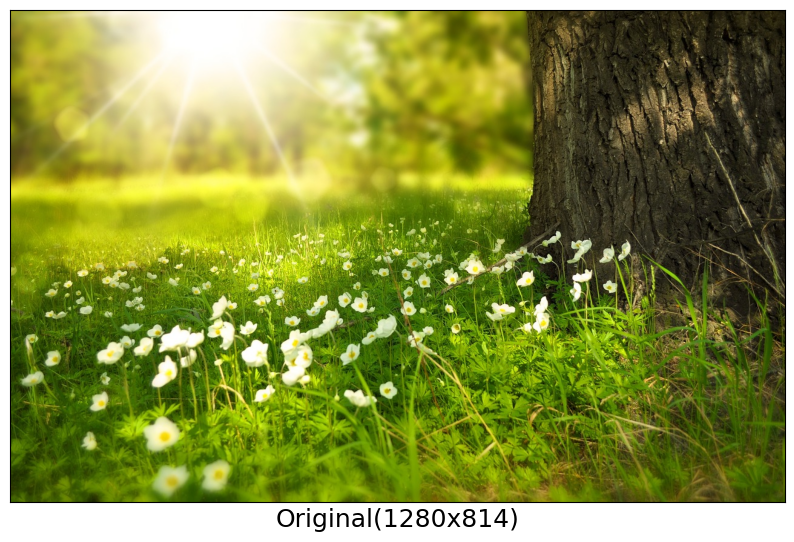

In [4]:
def show_image(img: np.ndarray):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlabel("Original({}x{})".format(img.shape[1],img.shape[0]), fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img)

show_image(img)

### Processing Data (Normalize and Reshape).
* Normalize image data by dividing it by 255. for faster computations. 
* Reshape the image data into an n x 3 matrix where n = number of pixels

In [5]:
# Image.fromarray(img.astype(np.uint8)).save(FILE+".png")

# Normailize image data by dividing it by 255. for faster computations. 
img = img / 255.

# Reshape the image data into an n x 3 matrix where n = number of pixels
x_flat = np.reshape(img, (img.shape[0] * img.shape[1] , img.shape[2]))

Let's view the shape of image data matrix.

In [6]:
x_flat.shape

(1041920, 3)

### Performing K-means
* Initializing models by calling KMeans() with required parameters.
* Perform K-means by calling model.fit()

Let's initialize 3 models corresponding to 3 compressed images with different **cluster** sizes.  

In [7]:
# X: Vector for performing K-means.  
# K: Number of clusters.  
# max_iters: Maximum number of iterations for a single run.  
# iters: Maximum number of times to run K-means. Final result will  
#        have the best(have low distortion) of 'iters' runs. Default = 1.  

# Initializing 3 models with cluster size 4, 8 and 16.
model1 = KMeans(X=x_flat, K=4, max_iters=10, iters=5)
model2 = KMeans(X=x_flat, K=8, max_iters=10, iters=5)
model3 = KMeans(X=x_flat, K=16, max_iters=10, iters=5)

Perform K-means on the above models.

In [6]:
centroids, centroid_idx, _ = model1.fit()
x_compressed = centroids[centroid_idx, :]
x_compressed = x_compressed * 255
img1 = np.reshape(x_compressed, orig_shape).astype(np.uint8)

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.15045534667325663
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.14478250834623263
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.14381352375536063
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.14339701993854514
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.14313222628224345
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.14293547818589286
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.14278427744752892
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.14266718396509337
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.14256886511082226
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.14249409034932714
K-means Iteration: 1, Distortion: 0.14249409034932714, Best: (1, 0.14249409034932714)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.21332267920407472
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.1563743768906441
K-means Itera

In [7]:
centroids, centroid_idx, _ = model2.fit()
x_compressed = centroids[centroid_idx, :]
x_compressed = x_compressed * 255
img2 = np.reshape(x_compressed, orig_shape).astype(np.uint8)

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.10748046707028219
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.10359840037905324
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.10175322546989657
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.1007280727802225
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.10017670218014883
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.09986419790103739
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.09961907790036885
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.09941342769445918
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.09922768717026248
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.09908825912016823
K-means Iteration: 1, Distortion: 0.09908825912016823, Best: (1, 0.09908825912016823)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.12670567134936098
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.11248422350659937
K-means Itera

In [8]:
centroids, centroid_idx, _ = model3.fit()
x_compressed = centroids[centroid_idx, :]
x_compressed = x_compressed * 255
img3 = np.reshape(x_compressed, orig_shape).astype(np.uint8)

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.07783770787706731
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.07292699630789862
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.07141237046129734
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.07089426303879978
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.07065705857785398
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.07053408172109399
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.07045771093591834
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.07040197956622816
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.07035883824032572
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.07032381012724012
K-means Iteration: 1, Distortion: 0.07032381012724012, Best: (1, 0.07032381012724012)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.07570128646909716
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.07038236246257269
K-means Iter

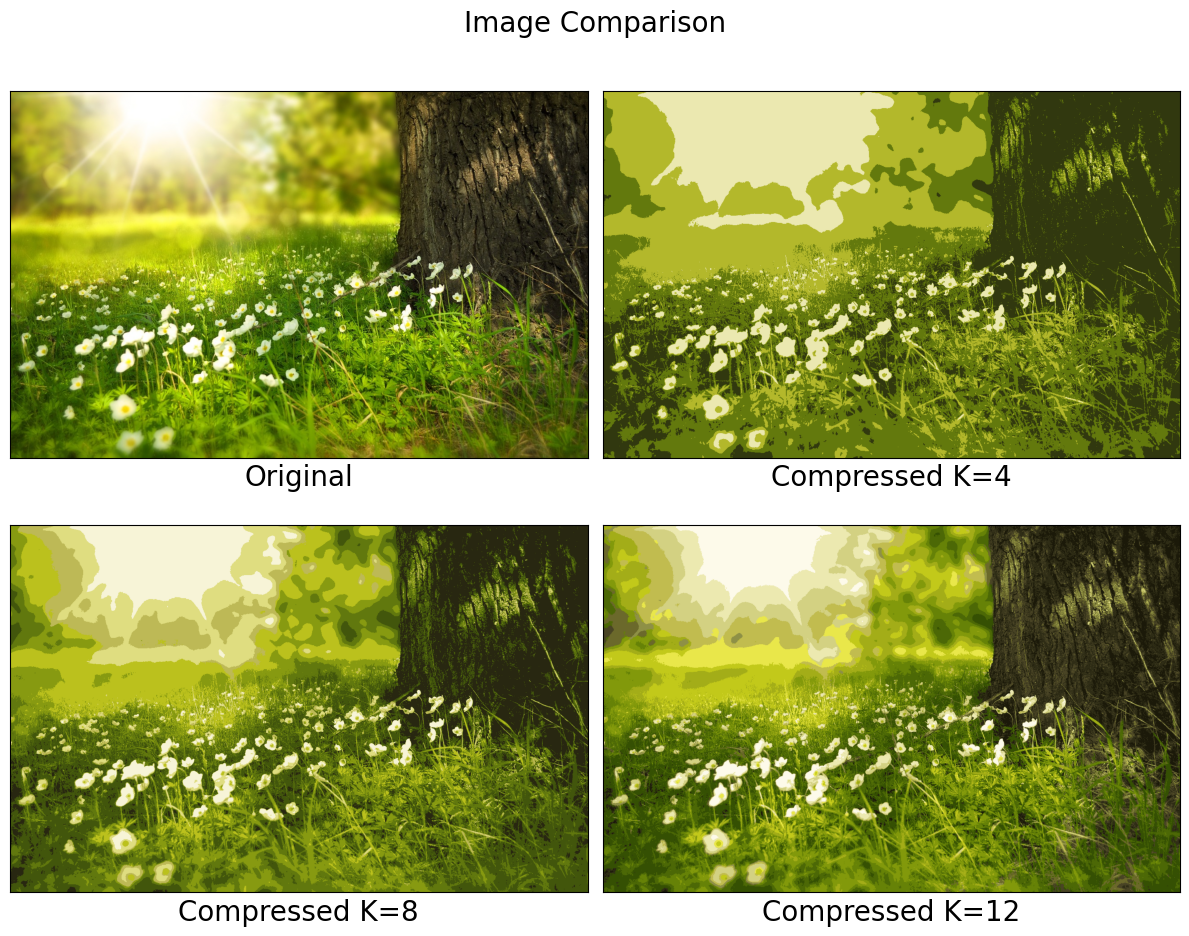

In [38]:
# Below code displays 4 images(1 original and 3 compressed) above side by side.

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9.6))

# Plot each image in a subplot
axes[0, 0].imshow(img)
axes[0, 0].set_xlabel("Original", fontsize=20)
# axes[0, 0].set_title("Original")

axes[0, 1].imshow(img1)
axes[0, 1].set_xlabel("Compressed K=4", fontsize=20)
# axes[0, 1].set_title("Compressed K=4")

axes[1, 0].imshow(img2)
axes[1, 0].set_xlabel("Compressed K=8", fontsize=20)
# axes[1, 0].set_title("Compressed K=8")

axes[1, 1].imshow(img3)
axes[1, 1].set_xlabel("Compressed K=12", fontsize=20)
# axes[1, 1].set_title("Compressed K=16")

# Hide axis labels and ticks
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the images
fig.suptitle('Image Comparison', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
i = Image.fromarray(X_recovered.astype(np.uint8))
plt.imshow(i)

In [ ]:
i.save("lol.png")